1. Побудувати рекурентну нейронну мережу для прогнозування слів.
 Підібрати архітектуру моделі, кількість  і тип рекурентних шарів, гіперпараметри моделі.
 Побудувати графіки функції втрат і точності.
 Також доцільно викоритстати Керас тюнер для підбору параметрів.


{' ': 1, 'н': 2, 'о': 3, 'и': 4, 'е': 5, 'в': 6, 'д': 7, 'а': 8, 'і': 9, 'у': 10, 'т': 11, 'м': 12, 'я': 13, 'к': 14, 'п': 15, 'с': 16, '\n': 17, 'ч': 18, 'б': 19, 'з': 20, 'г': 21, 'ь': 22, 'р': 23, 'є': 24, 'й': 25, 'ж': 26, 'л': 27, 'ш': 28, 'х': 29}


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_30 (SimpleRNN)            │ (None, 128)                 │          20,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 34)                  │           4,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,250 (98.63 KB)

 Trainable params: 25,250 (98.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0635 - loss: 3.5249
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1088 - loss: 3.3924 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2102 - loss: 3.2749
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3247 - loss: 3.1568
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3980 - loss: 3.0210
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4724 - loss: 2.9023
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4787 - loss: 2.7930
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4360 - loss: 2.6671
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4402 - loss: 2.5763 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3970 - loss: 2.4967 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4147 - loss: 2.3890
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4173 -

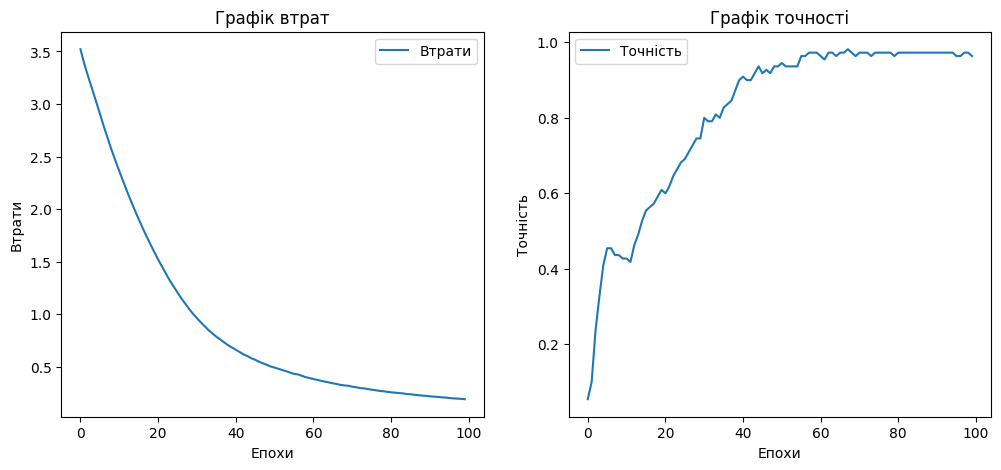

In [32]:
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

text = """
Невдачі неодмінно будуть, і те, як ви з ними впораєтеся, буде найважливішим показником того, чи досягнете ви успіху.
"""

# Обробка тексту
text = re.sub(r'[^\w\s]', '', text)

# парсим текст, як послідовність символів
num_characters = 34
tokenizer = Tokenizer(num_words=num_characters, char_level=True)
tokenizer.fit_on_texts([text])
print(tokenizer.word_index)

inp_chars = 3
data = tokenizer.texts_to_matrix(text)
n = data.shape[0] - inp_chars

X = np.array([data[i:i + inp_chars, :] for i in range(n)])
Y = data[inp_chars:]

# архітектура моделі
model = Sequential()
model.add(Input((inp_chars, num_characters)))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(num_characters, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()
# Тренування моделі
history = model.fit(X, Y, batch_size=32, epochs=100)

# Функція для генерації тексту
def buildPhrase(inp_str, str_len=50):
    for i in range(str_len):
        x = []
        for j in range(i, i + inp_chars):
            x.append(tokenizer.texts_to_matrix(inp_str[j]))

        x = np.array(x)
        inp = x.reshape(1, inp_chars, num_characters)

        pred = model.predict(inp)
        d = tokenizer.index_word[pred.argmax(axis=1)[0]]

        inp_str += d

    return inp_str


res = buildPhrase("Невдачі")
print(res)
# Побудова графіків функції втрат і точності
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Втрати')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()
    plt.title('Графік втрат')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Точність')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()
    plt.title('Графік точності')

    plt.show()

plot_history(history)


Висновок.
Фінальна точність: Приблизно 96,41%.
Фінальна втрата: близько 0.1912.
Це означає, що наша модель працює добре, досягаючи відносно високої точності після 100 епох.
